<a href="https://colab.research.google.com/github/jun604/AI_Assignment/blob/main/%5BAI2025_Assignment4%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [1]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2025-12-15 06:10:31.697718: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-15 06:10:32.093792: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-15 06:10:34.704579: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


### Data Preparation
Use CIFAR10 handwriting dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [3]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [4]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal")
])

model = tf.keras.models.Sequential([
    data_augmentation,

    # Convolutional layer. Learn 64 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(
        64, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)
    ),
    tf.keras.layers.BatchNormalization(),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Convolutional layer. Learn 128 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # Convolutional layer. Learn 246 filters using a 3x3 kernel
    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),

    # GlobalAveragePooling2D units
    tf.keras.layers.GlobalAveragePooling2D(),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.4),

    # Add a hidden layer with dropout
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.4),

    # Add an output layer with output units for all 10 digits
    tf.keras.layers.Dense(10, activation="softmax")
])

2025-12-15 06:10:41.816507: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile and Train neural network

In [5]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/30


2025-12-15 06:10:43.211297: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 552960000 exceeds 10% of free system memory.


704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.3683 - loss: 1.7319

2025-12-15 06:14:51.353712: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 61440000 exceeds 10% of free system memory.


704/704 ━━━━━━━━━━━━━━━━━━━━ 258s 361ms/step - accuracy: 0.4499 - loss: 1.5052 - val_accuracy: 0.5230 - val_loss: 1.4236
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 255s 352ms/step - accuracy: 0.5844 - loss: 1.1578 - val_accuracy: 0.5874 - val_loss: 1.1373
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 266s 358ms/step - accuracy: 0.6355 - loss: 1.0376 - val_accuracy: 0.6388 - val_loss: 1.0386
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 251s 357ms/step - accuracy: 0.6594 - loss: 0.9652 - val_accuracy: 0.6520 - val_loss: 0.9949
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 256s 364ms/step - accuracy: 0.6846 - loss: 0.8998 - val_accuracy: 0.7380 - val_loss: 0.7535
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 255s 353ms/step - accuracy: 0.7030 - loss: 0.8560 - val_accuracy: 0.7216 - val_loss: 0.8048
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 261s 352ms/step - accuracy: 0.7148 - loss: 0.8216 - val_accuracy: 0.7390 - val_loss: 0.7595
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 253s 360ms/step - accuracy: 0.7259 - loss: 0.79

## Evaluate neural network performance


In [6]:
model.evaluate(x_test,  y_test, verbose=2)

2025-12-15 08:17:42.312758: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 11s - 36ms/step - accuracy: 0.8148 - loss: 0.5507


[0.5507192611694336, 0.8148000240325928]

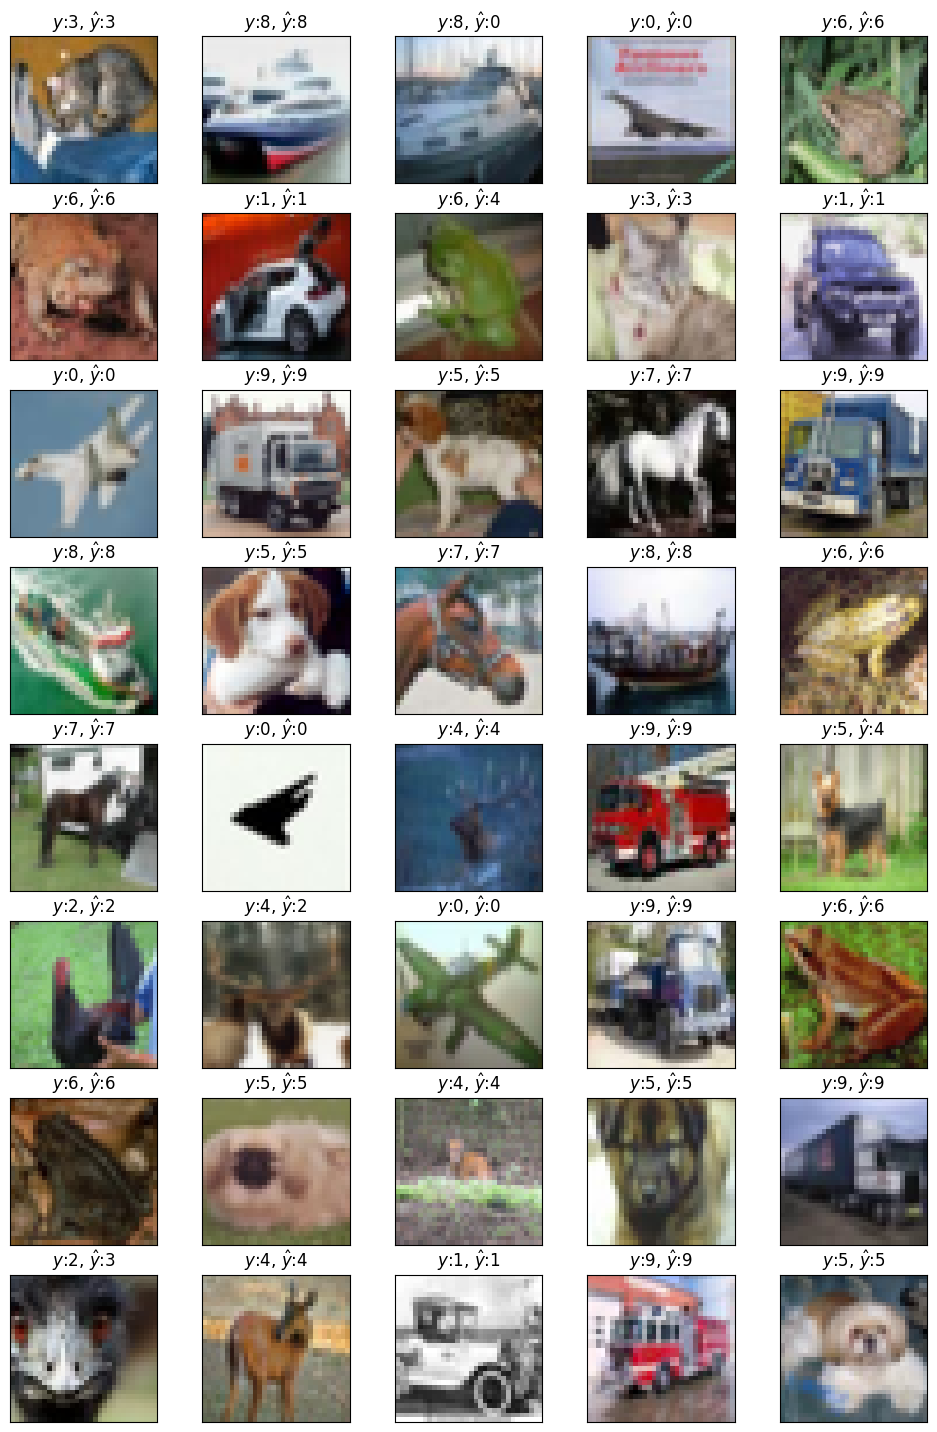

2025-12-15 08:18:04.788772: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


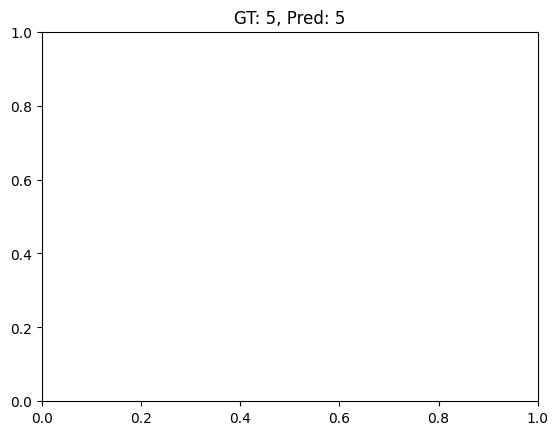

In [7]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [8]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


2025-12-15 08:18:16.337270: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 122880000 exceeds 10% of free system memory.


Test Accuracy: 0.8148000240325928
